In [1]:
from torch.utils.data import  DataLoader
from LIDC_data import LIDC_Dataset
import torch,os
import pandas as pd
# import torchio as tio
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import v2
from configparser import ConfigParser

In [2]:
import torchvision.models as models
model = models.resnet18(pretrained=True)

/home/vscode/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
import shutil
shutil.get_terminal_size()

os.terminal_size(columns=80, lines=24)

In [4]:
prep_tr = [
    v2.Lambda(lambda x: torch.clamp(x,-1000,400)),
    # tio.Clamp(-1000,400),
    v2.Lambda(lambda x: (x+1000)/1400),
    # tio.RescaleIntensity((0,1), in_min_max=(-1000,400)),
    v2.CenterCrop((384,384)),
    # tio.CropOrPad((1,384,384),padding_mode='minimum')
]

aug_tr = [
    v2.RandomAffine(degrees=15),
    v2.RandomHorizontalFlip(),
    # v2.GaussianNoise(0,0.1)
]
trans0 = v2.Compose( prep_tr + aug_tr )

In [5]:
parser = ConfigParser()
parser.read('.settings')
root_dir = parser.get('dataset','root_dir') #/workspaces/data/lidc-idri/slices
meta_dir = parser.get('dataset','meta_dir') #/workspaces/data/lidc-idri/splits
train_data = LIDC_Dataset(root_dir,metapath=os.path.join(meta_dir,'train_malB.csv'),transform=trans0)
test_data = LIDC_Dataset(root_dir,metapath=os.path.join(meta_dir,'test_malB.csv'),transform=trans0)

# train_data = LIDC_Dataset('/data1/lidc-idri/slices',metapath='/data2/lijin/lidc-prep/kjs/splits/train_malB.csv',transform=trans0)
# test_data = LIDC_Dataset('/data1/lidc-idri/slices',metapath='/data2/lijin/lidc-prep/kjs/splits/test_malB.csv')
total_train_data = len(train_data)
total_test_data = len(test_data)
print('total_train_data:',total_train_data, 'total_test_data:',total_test_data)

total_train_data: 5495 total_test_data: 2354


In [6]:
train_data[0][0].shape

torch.Size([1, 384, 384])

In [7]:
tfig = trans0(train_data[0][0])

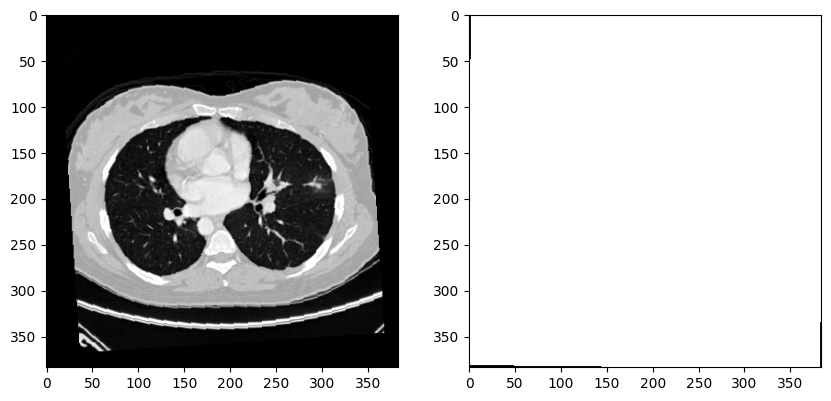

In [8]:
fig, axes = plt.subplots(1,2,figsize=(10, 5))
axes[0].imshow(train_data[0][0][0], cmap='gray')
axes[1].imshow(tfig[0], cmap='gray')

In [10]:
pd.Series(train_data[0][0][0].flatten()).describe()

count    147456.000000
mean          0.282483
std           0.346511
min           0.000000
25%           0.000000
50%           0.069286
75%           0.674286
max           1.000000
dtype: float64

In [9]:
pd.Series(tfig[0].flatten()).describe()

count    147456.000000
mean          0.710748
std           0.051563
min           0.000000
25%           0.714286
50%           0.714335
75%           0.714767
max           0.715000
dtype: float64

In [15]:
train_data[0][1]

1

In [17]:
trainloader = DataLoader(train_data, batch_size=16, shuffle=True)

In [25]:
d_iter = iter(trainloader)
batch, target = next(d_iter)
target[0].dtype

torch.int64